
**1. Sıcaklık Tahmini**
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv('C:\\Users\\Pc\\Desktop\\weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weathers=weather.loc[:, ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
weathers.head()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,0.89,14.1197,1015.13
1,9.355556,0.86,14.2646,1015.63
2,9.377778,0.89,3.9284,1015.94
3,8.288889,0.83,14.1036,1016.41
4,8.755556,0.83,11.0446,1016.51


**MODEL TAHMİNİ**

In [4]:
X = weathers[['Humidity','Wind Speed (km/h)', 'Pressure (millibars)']]
Y = weathers[['Temperature (C)']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [[-3.24398999e+01 -1.94546893e-01 -7.15579969e-04]]
Sabit değer (bias): 
 [38.59379935]


**Varsayım 1: Katsayılarda modelin doğrusallığı**

In [6]:
tahmin = lrm.predict(X)
print(tahmin)

[[ 6.24893798]
 [ 7.19358734]
 [ 8.23104411]
 ...
 [17.95289908]
 [16.35440388]
 [16.93506185]]


**Varsayım 2: Hata terimi ortalamada sıfır olmalıdır**

In [7]:
hatalar = Y - tahmin

print("Sıcaklık modelinin ortalama hatası : {}".format(np.mean(hatalar)))

Sıcaklık modelinin ortalama hatası : Temperature (C)   -8.495639e-15
dtype: float64


**Varsayım 3: homoscedasticity**

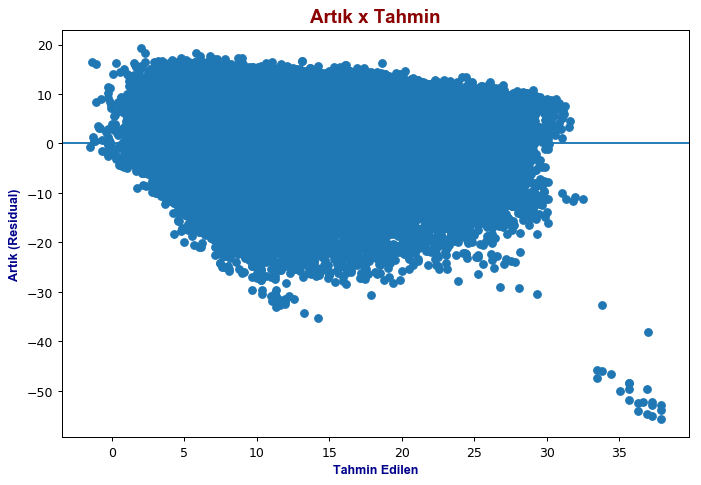

In [8]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

hedef değişkeni arttığında hataların varyansı büyüyor. homoscedasticity olmadığını gösteriyor

In [9]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print(lev_stats, '\n')
print(bart_stats)


LeveneResult(statistic=array([2435.45049023]), pvalue=array([0.])) 

BartlettResult(statistic=2595.338595261539, pvalue=0.0)


p 0.005 ten küçük hatalar heteroscedastic 

**Varsayım 4: düşük çoklu doğrusallık/low multicollinearity**

In [10]:
cormat = weathers.corr()
cormat

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,-0.049263
Pressure (millibars),-0.005447,0.005454,-0.049263,1.000000


Aralarındaki ilişki düşük

**Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır**

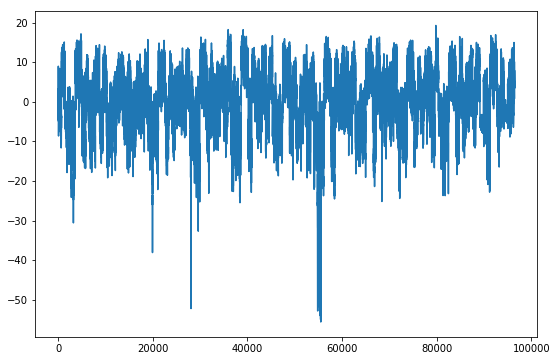

In [11]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

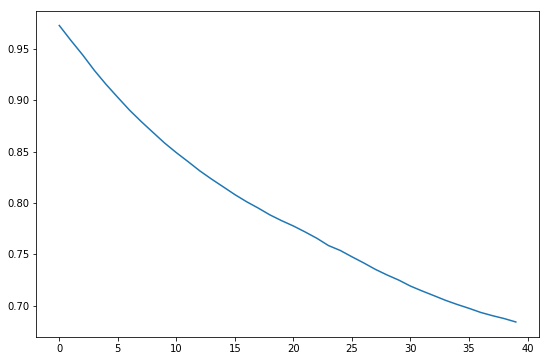

In [12]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

otokorelasyon yüksek modelimiz bu varsayımı sağlamıyor.

**Varsayım 6: özellikler hatalarla korele olmamalıdır**

In [13]:
weathers['Hata'] = hatalar
weathers.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Hata
Temperature (C),1.000000,-6.322547e-01,8.956968e-03,-5.447106e-03,7.625418e-01
Humidity,-0.632255,1.000000e+00,-2.249515e-01,5.454263e-03,-4.883072e-15
Wind Speed (km/h),0.008957,-2.249515e-01,1.000000e+00,-4.926281e-02,1.178437e-15
Pressure (millibars),-0.005447,5.454263e-03,-4.926281e-02,1.000000e+00,-9.377180e-16
Hata,0.762542,-4.883072e-15,1.178437e-15,-9.377180e-16,1.000000e+00


hatalar ve özellikler arasında düşük korelasyon var.

**Hataların Normalliği**

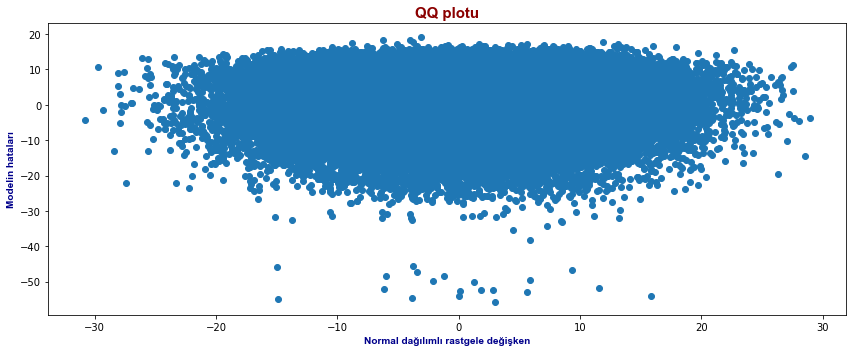

In [14]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))


plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print('JB Test Results:',jb_stats, '\n')
print(norm_stats)

JB Test Results: (3852.043000938106, 0.0) 

NormaltestResult(statistic=array([3420.50778308]), pvalue=array([0.]))


p değeri <0.005'ten hatalar normal dağılıma uymamaktadır.

**2. Ev fiyatları**
Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter notebooku gönderin:

Ev Fiyatları verilerini Kaggle'dan indirin.
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [65]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [66]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [68]:
df=data.loc[:, ['Street', 'OverallQual', 'YearBuilt', 'ExterQual', 'SalePrice']]
df.head(10)

,Street,OverallQual,YearBuilt,ExterQual,SalePrice
0,Pave,7,2003,Gd,208500
1,Pave,6,1976,TA,181500
2,Pave,7,2001,Gd,223500
3,Pave,7,1915,TA,140000
4,Pave,8,2000,Gd,250000
5,Pave,5,1993,TA,143000
6,Pave,8,2004,Gd,307000
7,Pave,7,1973,TA,200000
8,Pave,7,1931,TA,129900
9,Pave,5,1939,TA,118000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
Street         1460 non-null object
OverallQual    1460 non-null int64
YearBuilt      1460 non-null int64
ExterQual      1460 non-null object
SalePrice      1460 non-null int64
dtypes: int64(3), object(2)
memory usage: 57.1+ KB


**Eksik değer var mı bakalım**

In [70]:
df.isnull().sum()*100/df.count()

Street         0.0
OverallQual    0.0
YearBuilt      0.0
ExterQual      0.0
SalePrice      0.0
dtype: float64

**Veride eksik değer yok**

**Veride aykırı değer var mı bakıyoruz.**

<Figure size 432x288 with 0 Axes>

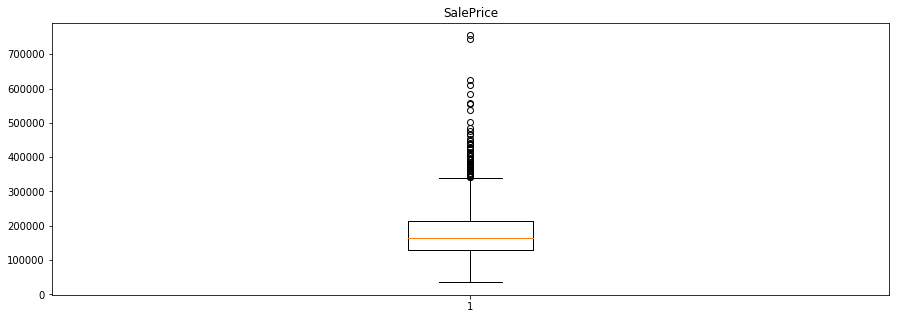

In [71]:
plt.clf()
plt.figure(figsize = (15,5))
plt.boxplot(df['SalePrice'])
plt.title("SalePrice")
plt.show()

SalePrice değişkeninde oldukça fazla aykırı değer var winsorize ile dolduralım.

Text(0.5, 1.0, 'Winsorize Saleprice')

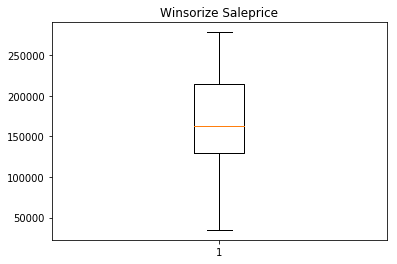

In [72]:
df['wins_sprice'] = winsorize(df["SalePrice"], (0, 0.10))
plt.boxplot(df['wins_sprice'])
plt.title("Winsorize Saleprice")

aykırı değerlerden kurtulmuş olduk

**Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.**

Text(0.5, 1.0, 'SalePrice')

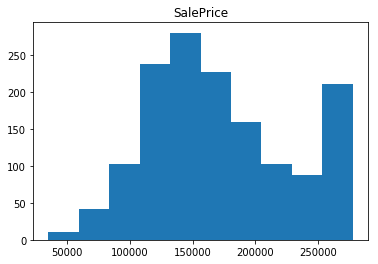

In [73]:
plt.hist(df['wins_sprice'])
plt.title("SalePrice")

sola doğru eğik bir grafik var

**Model Tahmini**

In [74]:
df["Str"] = pd.get_dummies(df.Street, drop_first=True)
df["Ext"] = df.ExterQual.replace({'Gd':1, "TA":0, "Ex":2, "Fa":3})
df[['Str','Ext']].head()

,Str,Ext
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1


In [75]:
Y1 = df['wins_sprice']
X1 = df[['Str', 'YearBuilt', 'Ext', 'OverallQual' ]]

In [76]:
lrm = linear_model.LinearRegression()
lrm.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [14002.53753254   326.11552822  8974.49297782 27812.06736231]
Sabit değer (bias): 
 -657317.4877379073


**Varsayım 1: Katsayılarda modelin doğrusallığı**

In [78]:
tahminev = lrm.predict(X1)
print(tahminev)

[213553.41733789 167961.73773576 212901.18628145 ... 202308.74756593
 131670.66663967 145536.89254083]


**Hata terimleri ortalaması sıfır**

In [79]:
hatalar1 = Y1 - tahminev

print("Ev fiyatları modelinin ortalama hatası : {}".format(np.mean(hatalar1)))

Ev fiyatları modelinin ortalama hatası : 9.97503887708873e-11


**Homoscedasticity**

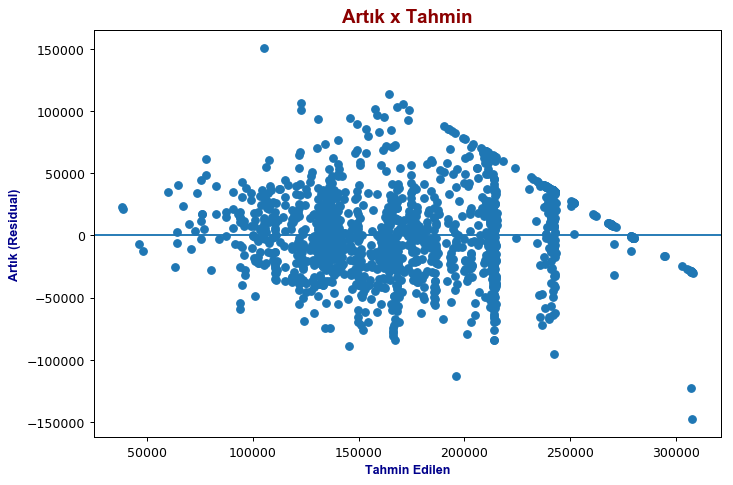

In [80]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahminev, hatalar1)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [81]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahminev, hatalar1)
lev_stats = levene(tahminev, hatalar1)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 224.304 ve p değeri : 0.000000000000000000000
Levene test değeri   : 258.296 ve p değeri : 0.000000000000000000000


p<0.005 ten hatalar heteroscedastic olduğu anlamına gelir.

**Düşük çoklu doğrusallık/low multicollinearity**

In [82]:
cormat = df.corr()
cormat

,OverallQual,YearBuilt,SalePrice,wins_sprice,Str,Ext
OverallQual,1.000000,0.572323,0.790982,0.811761,0.058823,0.576478
YearBuilt,0.572323,1.000000,0.522897,0.592657,0.021137,0.485289
SalePrice,0.790982,0.522897,1.000000,0.913016,0.041036,0.567079
wins_sprice,0.811761,0.592657,0.913016,1.000000,0.047213,0.554891
Str,0.058823,0.021137,0.041036,0.047213,1.000000,-0.111881
Ext,0.576478,0.485289,0.567079,0.554891,-0.111881,1.000000


düşük korelasyon var

**Hata terimleri birbiriyle ilişkisiz mi?**

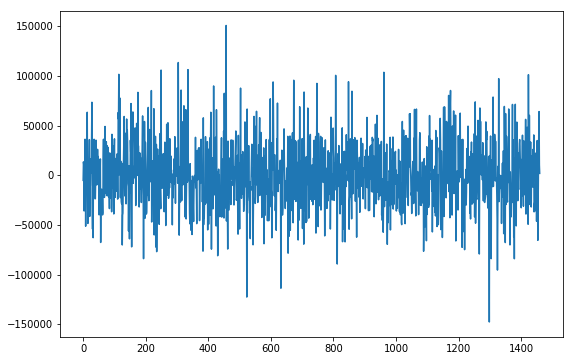

In [83]:
plt.figure(figsize=(9,6))
plt.plot(hatalar1)
plt.show()

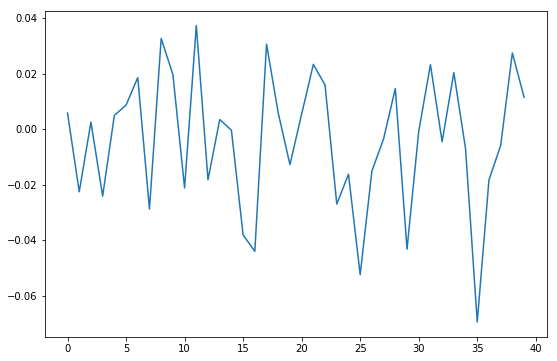

In [84]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar1)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

hataların otokorelasyonu düşük model varsayımı sağlıyor

**Özelliklerin hatalarla korele olması**

In [85]:
df['Hata'] = hatalar1
df.corr()

,OverallQual,YearBuilt,SalePrice,wins_sprice,Str,Ext,Hata
OverallQual,1.000000e+00,5.723228e-01,0.790982,0.811761,5.882319e-02,5.764777e-01,-3.366296e-15
YearBuilt,5.723228e-01,1.000000e+00,0.522897,0.592657,2.113676e-02,4.852892e-01,4.693803e-16
SalePrice,7.909816e-01,5.228973e-01,1.000000,0.913016,4.103554e-02,5.670787e-01,4.457686e-01
wins_sprice,8.117607e-01,5.926571e-01,0.913016,1.000000,4.721325e-02,5.548913e-01,5.578725e-01
Str,5.882319e-02,2.113676e-02,0.041036,0.047213,1.000000e+00,-1.118812e-01,-2.041347e-16
Ext,5.764777e-01,4.852892e-01,0.567079,0.554891,-1.118812e-01,1.000000e+00,-2.206687e-15
Hata,-3.366296e-15,4.693803e-16,0.445769,0.557873,-2.041347e-16,-2.206687e-15,1.000000e+00


Hatalar özelliklerle oldukça düşük korelasyona sahip varsayım karşılanıyor.

**Hataların Normalliği**

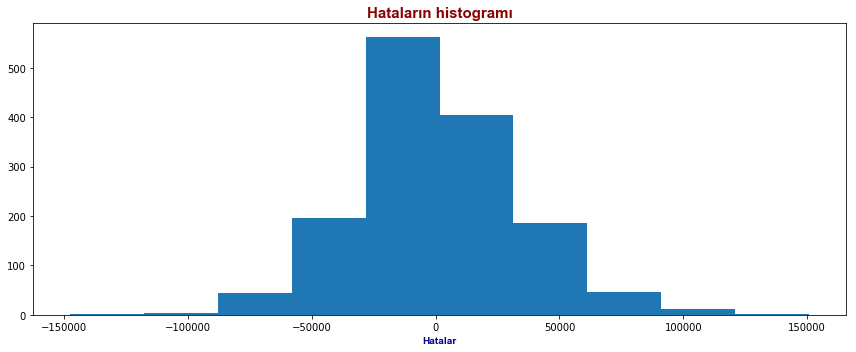

In [88]:
rand_nums = np.random.normal(np.mean(hatalar1), np.std(hatalar1), len(hatalar1))

plt.figure(figsize=(12,5))

plt.hist(hatalar1)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'QQ plotu')

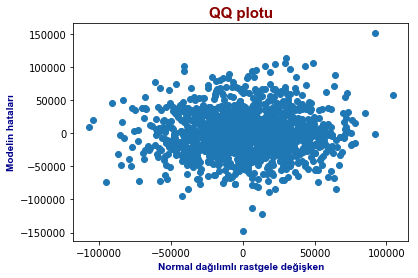

In [89]:
rand_nums = np.random.normal(np.mean(hatalar1), np.std(hatalar1), len(hatalar1))

plt.scatter(rand_nums, hatalar1)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

In [90]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jarq_stats = jarque_bera(hatalar1)
nor_stats = normaltest(hatalar1)
print('Jarque Bera Stats:', jarq_stats, '\n')
print(nor_stats)

Jarque Bera Stats: (76.85532371037858, 0.0) 

NormaltestResult(statistic=43.40775650291978, pvalue=3.7508132325353006e-10)


p değeri <0.005'ten hipotezi karşılamadı. hatalar normal dağılıma sahip değil Q-Q plotta da normal dağılmadığını görmekteyiz.